In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/archive-2/Test/real'
fake_images_path = 'D:/major project/archive-2/Test/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MesoNet model architecture
def create_meso_net():
    model = Sequential()

    # First block
    model.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Second block
    model.add(Conv2D(8, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Third block
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fourth block
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Create the MesoNet model
model = create_meso_net()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.5262 - loss: 0.8404 - val_accuracy: 0.5021 - val_loss: 0.8355
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.6102 - loss: 0.6615 - val_accuracy: 0.6327 - val_loss: 0.6322
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.6411 - loss: 0.6270 - val_accuracy: 0.6850 - val_loss: 0.5956
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.6558 - loss: 0.6093 - val_accuracy: 0.6777 - val_loss: 0.5862
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.6670 - loss: 0.6020 - val_accuracy: 0.7020 - val_loss: 0.5736
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.6809 - loss: 0.5814 - val_accuracy: 0.7231 - val_loss: 0.5552
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.6812 - loss: 0.5768 - val_accuracy: 0.7180 - val_loss: 0.5265
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.7049 - loss: 0

In [3]:
result = predict_image('D:/major project/archive-2/Test/real/real_1.jpg')
print(f'The image is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The image is: Real


In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/archive-2/Test/real'
fake_images_path = 'D:/major project/archive-2/Test/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MesoNet model architecture
def create_meso_net():
    model = Sequential()

    # First block
    model.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Second block
    model.add(Conv2D(8, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Third block
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fourth block
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Create the MesoNet model
model = create_meso_net()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Visualize accuracy and loss
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()



# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.5168 - loss: 0.9294 - val_accuracy: 0.5087 - val_loss: 0.7184
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.5552 - loss: 0.6886 - val_accuracy: 0.6109 - val_loss: 0.6551
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.6006 - loss: 0.6584 - val_accuracy: 0.6457 - val_loss: 0.6214
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.6257 - loss: 0.6390 - val_accuracy: 0.6632 - val_loss: 0.6031
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.6374 - loss: 0.6221 - val_accuracy: 0.6595 - val_loss: 0.5926
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.6401 - loss: 0.6048 - val_accuracy: 0.6902 - val_loss: 0.5698
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.6628 - loss: 0.5956 - val_accuracy: 0.6888 - val_loss: 0.5738
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - accuracy: 0.6750 - loss: 0

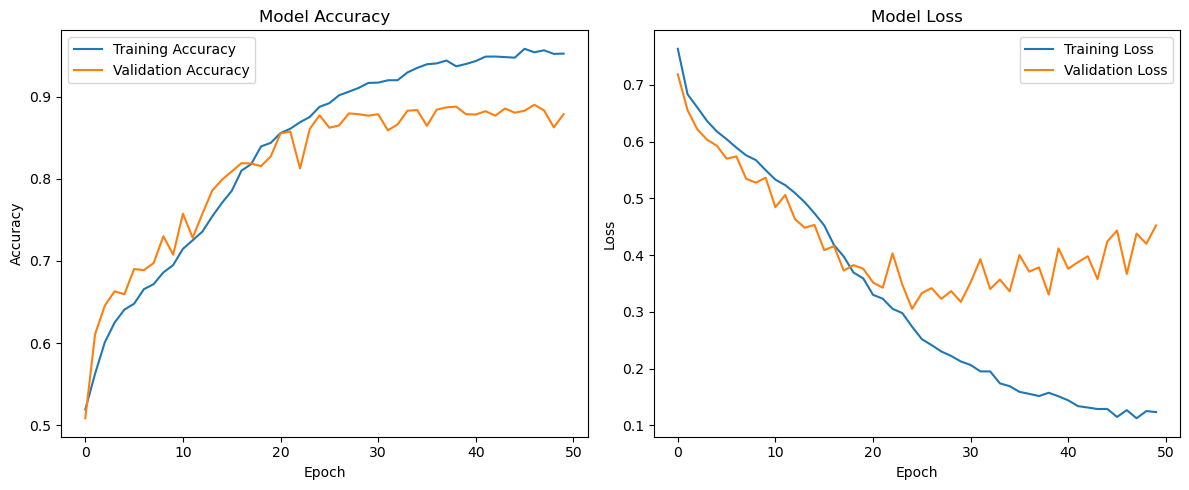

In [3]:
plot_metrics(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

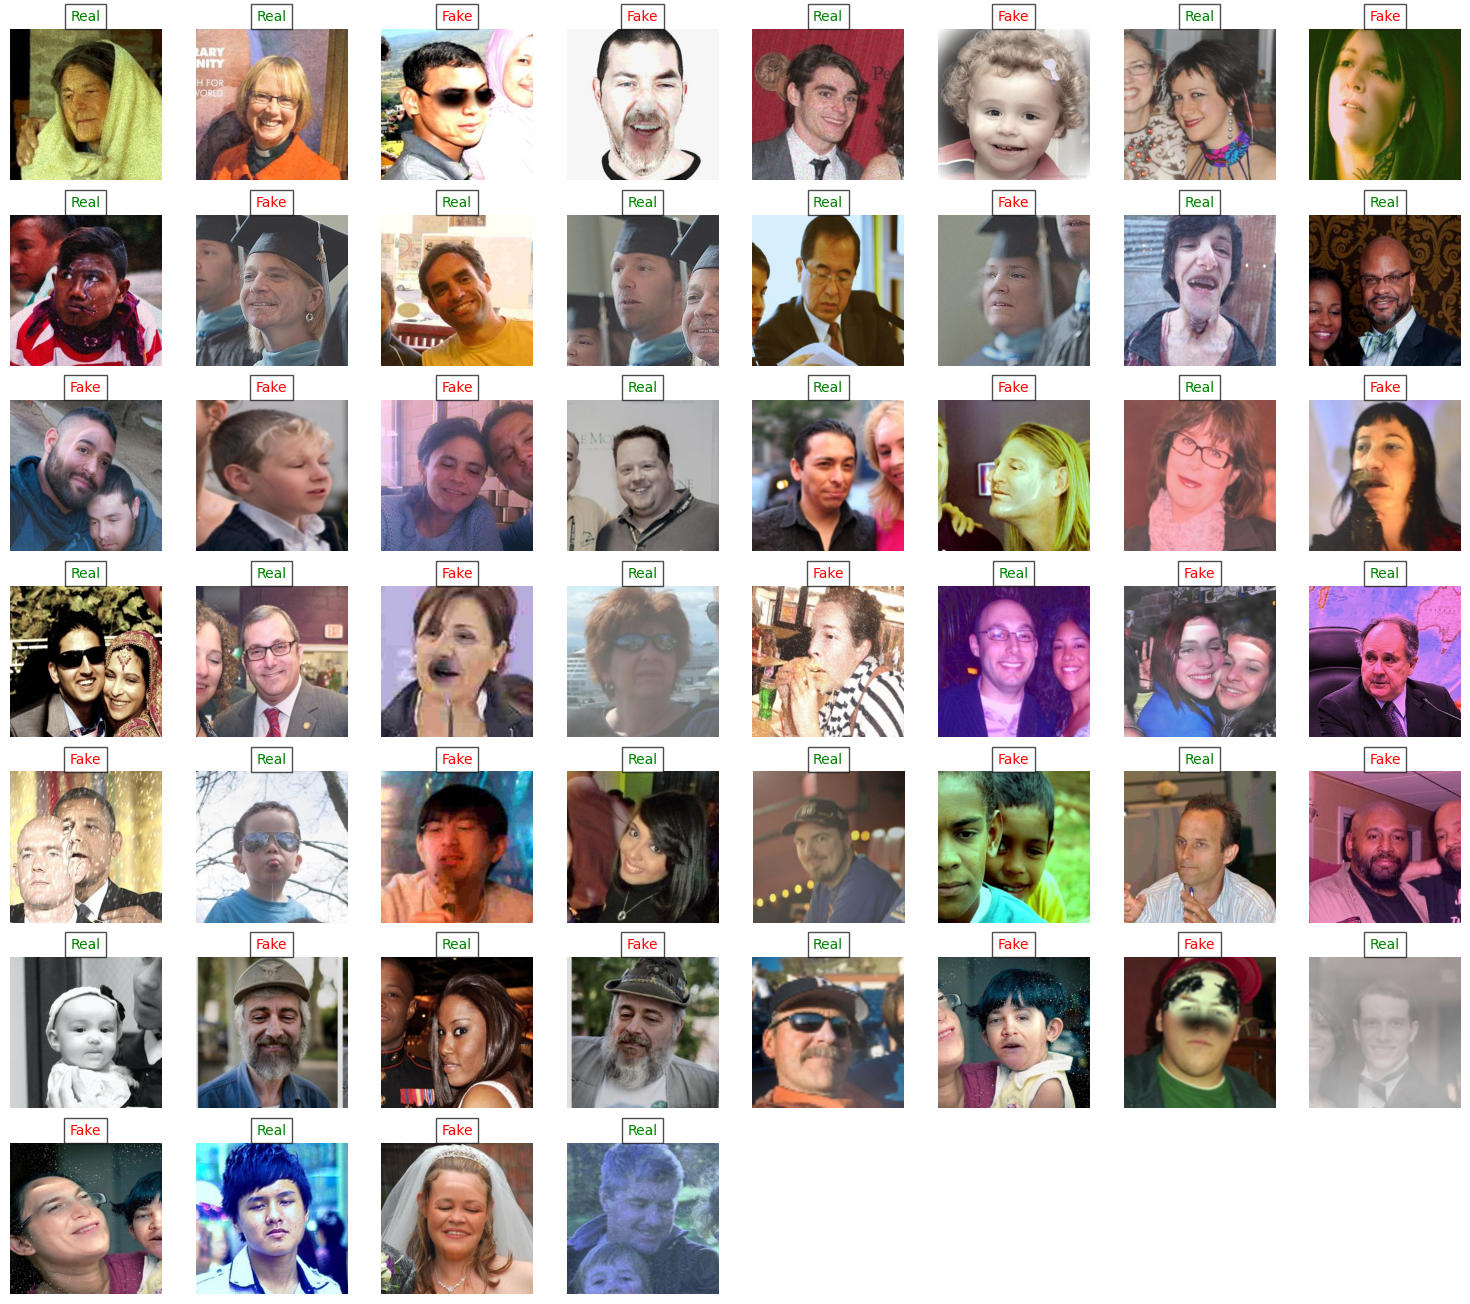

In [13]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to display multiple images with predictions
def display_images_with_predictions(img_folder, model, num_images=50):
    # Get a list of image paths
    img_paths = [os.path.join(img_folder, img) for img in os.listdir(img_folder)][:num_images]
    
    # Set up the grid size
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid size (rows and columns)

    # Create a figure
    plt.figure(figsize=(15, 15))

    for i, img_path in enumerate(img_paths):
        # Load the image using PIL
        img = Image.open(img_path)

        # Predict the image class
        prediction = predict_image(img_path)

        # Choose color based on prediction
        color = 'green' if prediction == "Real" else 'red'

        # Add a subplot for the current image
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes

        # Overlay the prediction as text
        plt.title(
            prediction,
            fontsize=10,
            color=color,
            bbox=dict(facecolor='white', alpha=0.7)
        )

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()

# Folder containing the images
img_folder = 'D:/major project/archive-2/Sample'  # Change to appropriate folder

# Display 30 images with predictions
display_images_with_predictions(img_folder, model, num_images=52)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


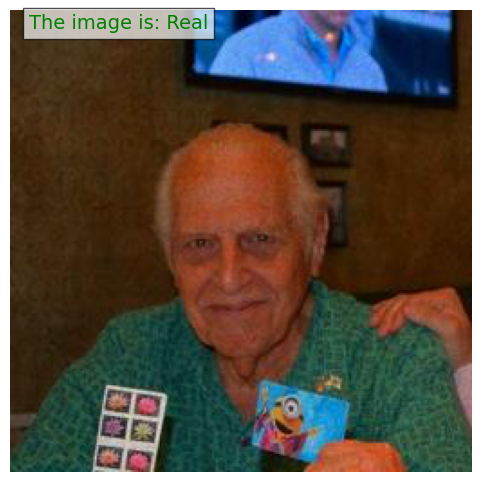

In [25]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'
    
# Function to display image with prediction
def display_image_with_prediction(img_path, prediction):
    # Load the image using PIL
    img = Image.open(img_path)

    # Set up the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes

    # Overlay the prediction as text
    color = 'green' if prediction == "Real" else 'red'  # Green for Real, Red for Fake
    plt.text(
        10, 10,  # Position (x, y)
        f'The image is: {prediction}',  # Text to display
        fontsize=14, color=color, bbox=dict(facecolor='white', alpha=0.7)
    )

    # Show the image
    plt.show()

# Path to the image
img_path = 'D:/major project/archive-2/sample/532.jpg'
# Predict the image class
prediction = predict_image(img_path)

# Display the image with the prediction
display_image_with_prediction(img_path, prediction)


In [15]:
result = predict_image('D:/major project/archive-2/Test/real/real_352.jpg')
print(f'The image is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The image is: Real
